In [8]:
import numpy as np
import matplotlib.pyplot as mp
from pylab import show
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression

In [2]:
data = np.loadtxt("data.csv")
np.random.seed(100)
np.random.shuffle(data)
features = []
digits = []
for row in data:
    if(row[0]==1 or row[0]==5):
        features.append(row[1:])
        digits.append(str(row[0]))
numTrain = int(len(features)*0.2)
trainFeatures = features[:numTrain]
testFeatures = features[numTrain:]
trainDigits = digits[:numTrain]
testDigits = digits[numTrain:]

In [3]:
#polynomial kernel with degree 3
kPCA = KernelPCA(n_components=2, kernel='poly', degree = 3)
kPCA_transform = kPCA.fit_transform(trainFeatures)
#trainFeatures_transformed.shape   (312, 2)

## 1 Feature Extraction  
Python package "sklearn" was used. Figure 2.1 shows the two features extracted by Kernel PCA with polynomail kernel with degree 3. 

**a) Compare kernel PCA features with the features you selected from HW1. Do these features seem to better separate the data?**  
Yes. The features extracted by kernel PCA seems to be separating the data better. The features I used for HW1 are mean intensity and intensity standard deviation. Although these two features separate data pretty well, the gap between two groups are pretty narrow. But in this kPCA case, the two groups are widely separated and are thus better (see Figure 2.1). 

**b) Give the explained variance ratio for each of the two feature extractions given above. Is there one of the methods which explains more variance than the other? Is this what you expect? Explain your answer.**  


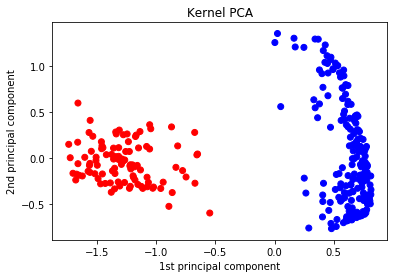

In [4]:
##Figure 2.1
mp.figure()
mp.title("Kernel PCA")
colors = []
for index in range(len(trainFeatures)):
    if(trainDigits[index]=="1.0"):
        colors.append("b")
    else:
        colors.append("r")
mp.scatter(kPCA_transform[:,0], kPCA_transform[:,1],c=colors)
mp.xlabel("1st principal component")
mp.ylabel("2nd principal component")
##############################################################################
explained_variance = np.var(kPCA_transform, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)


## 2 Logistic Regression  
Two features used in HW1 are mean intensity and intensity standard deviation. 

In [6]:
################ HW1 ################
X = []   ##mean
Y = []   ##std
colors = []
for index in range(len(trainFeatures)):
    X.append(np.mean(trainFeatures[index]))
    Y.append(np.std(trainFeatures[index]))  
    if(trainDigits[index]=="1.0"):
        colors.append("b")
    else:
        colors.append("r")
##normalization     
def normalize(lists):
    norm = [i * 2/(max(lists)-min(lists))+1-2*max(lists)/(max(lists)-min(lists)) for i in lists]
    return norm;
##normalize two features 
Xnorm = normalize(X)
Ynorm = normalize(Y)
Xnorm = np.asarray(Xnorm)
Ynorm = np.asarray(Ynorm)
simpleTrain = np.column_stack((Xnorm,Ynorm))

array([0.78807441, 0.21192559])

array([[-1.70446627, -0.16592057],
       [ 0.76218922, -0.61011314],
       [-1.1499088 ,  0.10935673],
       [-1.65383816, -0.18688293],
       [ 0.40084841,  0.91481887],
       [-1.66215911, -0.0618107 ],
       [ 0.69643462, -0.58832175],
       [ 0.77894697, -0.56100205],
       [-1.72754537,  0.00285546],
       [ 0.72717446, -0.62371509],
       [-1.22656154, -0.32917611],
       [ 0.70105012,  0.30596967],
       [ 0.51374924,  1.03012744],
       [ 0.69303492, -0.64654243],
       [ 0.81428363, -0.3966193 ],
       [ 0.78299054, -0.07547904],
       [-1.2356687 ,  0.17701095],
       [ 0.77857015, -0.18186394],
       [-1.33850116,  0.26101315],
       [ 0.64987783, -0.45971004],
       [-0.86513518, -0.37501275],
       [ 0.26505192, -0.38039686],
       [-1.36090842, -0.01184168],
       [-1.56070623, -0.15631951],
       [ 0.75131895, -0.37907529],
       [ 0.57564506,  0.75720606],
       [ 0.7180409 , -0.44103977],
       [ 0.62081652,  0.33843941],
       [-1.11395647,